## Building Reaction SMARTS

How to construct reaction SMARTS patterns to describe your polymerisation

<b>requirements: RDKit<b>

In [11]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

### Example 1: A simple condensation reaction

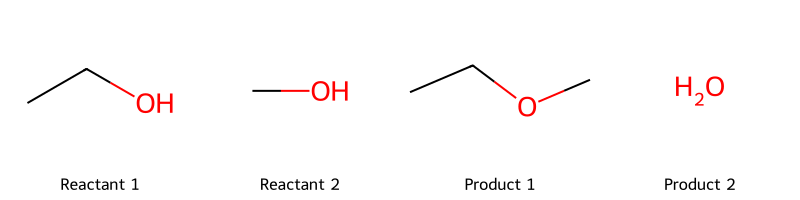

In [62]:
# A simple condensation
reactant1 = Chem.MolFromSmiles('CCO')
reactant2 = Chem.MolFromSmiles('CO')
product1 = Chem.MolFromSmiles('CCOC')
product2 = Chem.MolFromSmiles('O')
captions = ['Reactant 1', 'Reactant 2', 'Product 1', 'Product 2']
Draw.MolsToGridImage([reactant1, reactant2, product1, product2], molsPerRow=4, subImgSize=(200,200), legends=captions)

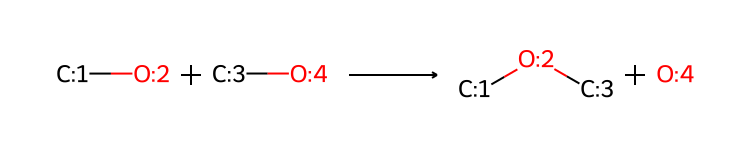

In [63]:
# View Reaction - Implicit Hydrogens used
# The reaction is defined as a SMARTS string, with index of atoms specified to guide reaction to form the correct products
# '.' is used to separate each reactant and product
# '>>' is used to indicate the reaction direction
rxn_smarts = '[C:1]-[O:2].[C:3]-[O:4]>>[C:1]-[O:2]-[C:3].[O:4]'
condensation = AllChem.ReactionFromSmarts(rxn_smarts)
condensation

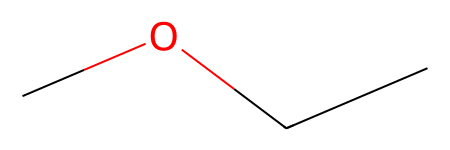

In [64]:
# Perform reaction and view organic product
condensation.RunReactants((reactant1, reactant2))[0][0]

### Example 2: Ring-opening polymerisation to form PLGA

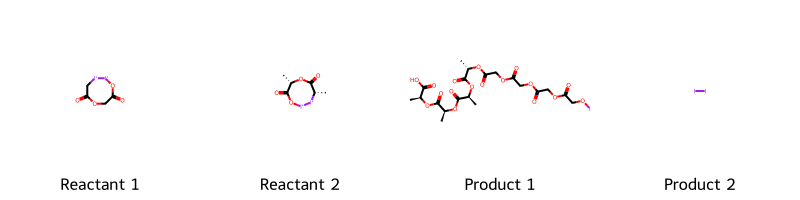

In [65]:
# Ring-opening polymerisation of PLGA
ring_smiles = ['O1C(=O)C[I+][I+]OC(=O)C1', 'C[C@@H]1[I+][I+]OC(=O)[C@H](C)OC1=O'] 
reactant1 = Chem.MolFromSmiles(ring_smiles[0])
reactant2 = Chem.MolFromSmiles(ring_smiles[1])
product1 = Chem.MolFromSmiles('IOCC(=O)OCC(=O)OCC(=O)OCC(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O[C@@H](C)C(=O)O')
product2 = Chem.MolFromSmiles('II')
captions = ['Reactant 1', 'Reactant 2', 'Product 1', 'Product 2']
Draw.MolsToGridImage([reactant1, reactant2, product1, product2], molsPerRow=4, subImgSize=(200,200), legends=captions)

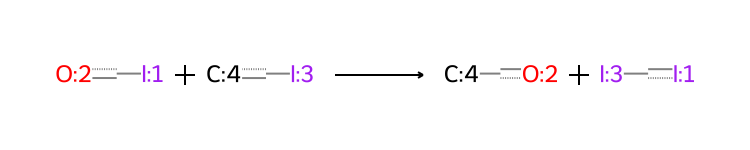

In [67]:
# Using reaction smarts to perform Ring-opening polymerisation
# Reaction represents the Iodine bridge breaking and the formation of an ester bond
rxn_smarts = '[I:1][O:2].[I:3][C:4]>>[C:4][O:2].[I:3][I:1]' 
ROP_iodine = AllChem.ReactionFromSmarts(rxn_smarts)
ROP_iodine

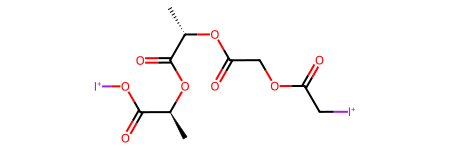

In [70]:
# Perform reaction and view organic product
# The end remains iodinated to allow for further polymerisation
ROP_iodine.RunReactants((reactant1, reactant2))[0][0]

### Other Examples

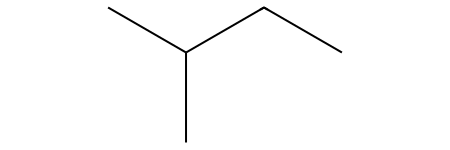

In [71]:
# Polyolephin Formation
reactant1 = Chem.MolFromSmiles('C=CC')
reactant2 = Chem.MolFromSmiles('C=C')
polyolephin_rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[C:4]>>[C:1][C:2][C:3][C:4]') # Double bonds are opened to form a single hydrocarbon chain
polyolephin_rxn.RunReactants((reactant1, reactant2))[0][0]

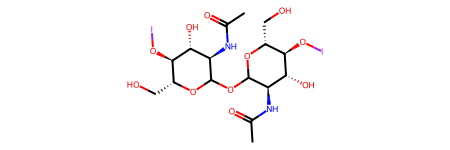

In [172]:
# Chitin Formation
GlcNAc = Chem.MolFromSmiles('CC(=O)N[C@H]1C(OI)O[C@H](CO)[C@@H](OI)[C@@H]1O') # GlcNAc with iodinated 1,4 positions
chitin_rxn = AllChem.ReactionFromSmarts('[I:1][O:2].[I:3][O:4][C:5]>>[C:5][O:2].[I:3][I:1].[O:4]')
chitin_rxn.RunReactants((GlcNAc, GlcNAc))[0][0]

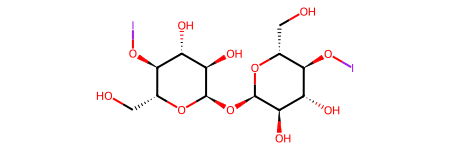

In [177]:
# Cellulose Formation
glucose = Chem.MolFromSmiles("C([C@@H]1[C@H]([C@@H]([C@H]([C@H](O1)OI)O)O)OI)O") # Glucose with iodinated 1,4 positions
cellulose_rxn = AllChem.ReactionFromSmarts('[I:1][O:2].[I:3][O:4][C:5]>>[C:5][O:2].[I:3][I:1].[O:4]')
cellulose_rxn.RunReactants((glucose, glucose))[0][0]

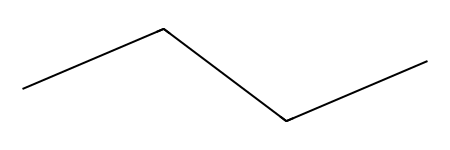

In [178]:
# Polyethene Formation
ethene = Chem.MolFromSmiles('C=C')
polyethene_rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[C:4]>>[C:1][C:2][C:3][C:4]')
polyethene_rxn.RunReactants((ethene, ethene))[0][0]

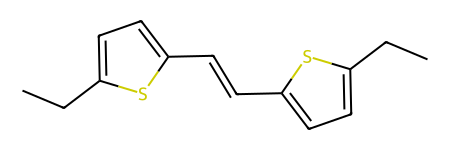

In [228]:
# Alkene with a polythiophene linker
PT = Chem.MolFromSmiles('S1C(CC)=CC=C(CC)1')
polythiophene_rxn = AllChem.ReactionFromSmarts('[C:1]-[C:2].[C:3]-[C:4]>>[C:1]=[C:3].[C:2]-[C:4]') # Polythiophene units joined together whilst maintaining ring structure
polythiophene_rxn.RunReactants((PT, PT))[0][0]

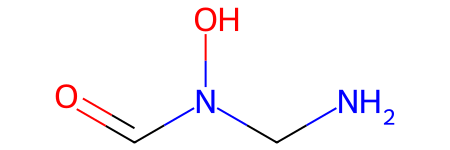

In [231]:
# Polyamide Formation
amide = Chem.MolFromSmiles('C(=O)N')
polyamide_rxn = AllChem.ReactionFromSmarts('[C:1]=[O:2].[N:3]>>[C:1][N:3][O:2]')
polyamide_rxn.RunReactants((amide, amide))[0][0]
